# Stock Market Prediction Project

## Introduction
This notebook presents our analysis and implementation of machine learning models for stock price prediction. We'll use historical data from Apple (AAPL) stock to predict future stock prices.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Import our modules
from src.data_loader import load_stock_data, prepare_data_for_training, plot_stock_data
from src.models import (
    LinearRegressionModel,
    RandomForestModel, 
    LSTMModel,
    plot_predictions,
    plot_training_history, 
    compare_models
)

## 1. Literature Review

### Related Studies on Stock Price Prediction

1. **Efficient Market Hypothesis and its Challenges**
   - Fama, E.F. (1970). "Efficient Capital Markets: A Review of Theory and Empirical Work." The Journal of Finance, 25(2), 383-417.
   - The efficient market hypothesis (EMH) suggests that stock prices reflect all available information, making prediction impossible. However, recent studies have challenged this hypothesis using machine learning techniques.

2. **Machine Learning Approaches for Stock Prediction**
   - Patel, J., Shah, S., Thakkar, P., & Kotecha, K. (2015). "Predicting stock market index using fusion of machine learning techniques." Expert Systems with Applications, 42(4), 2162-2172.
   - This study compared various machine learning algorithms including Random Forest, Support Vector Machines, and Neural Networks for stock market prediction and found that Random Forest often performed well for short-term predictions.

3. **Deep Learning Applications in Financial Time Series**
   - Fischer, T., & Krauss, C. (2018). "Deep learning with long short-term memory networks for financial market predictions." European Journal of Operational Research, 270(2), 654-669.
   - This research demonstrated that LSTM neural networks can effectively capture temporal dependencies in financial time series data, often outperforming traditional methods.
   
4. **Feature Engineering for Stock Prediction**
   - Sezer, O.B., Gudelek, M.U., & Ozbayoglu, A.M. (2020). "Financial time series forecasting with deep learning: A systematic literature review: 2005-2019." Applied Soft Computing, 90, 106181.
   - This comprehensive review discusses the importance of feature engineering in stock prediction models and various approaches to select the most relevant features.

Our project builds upon these studies, implementing and comparing both traditional machine learning models (Linear Regression, Random Forest) and neural network approaches for stock price prediction.

## 2. Loading and Visualizing Stock Data

We'll start by loading Apple (AAPL) stock data using yfinance and visualizing it.

In [2]:
# Load Apple stock data
ticker = 'AAPL'
data = load_stock_data(ticker=ticker)

# Display the first few rows
print(f"Loaded {len(data)} rows of {ticker} stock data")
data.head()

Loading AAPL data from ../data/AAPL_stock_data.csv
Loaded 1258 rows of AAPL stock data


C:\Users\ramir\OneDrive\Documents\GitHub\stock-prediction-model\src\data_loader.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN
2020-04-27,68.71942138671875,69.05189045933044,67.93799464568525,68.38694490813113,117087600
2020-04-28,67.60553741455078,69.36496081135085,67.51332558167111,69.1829514944405,112004800
2020-04-29,69.82603454589844,70.29683242001799,68.89414803177873,69.0979975124322,137280800


TypeError: 'value' must be an instance of str or bytes, not a float

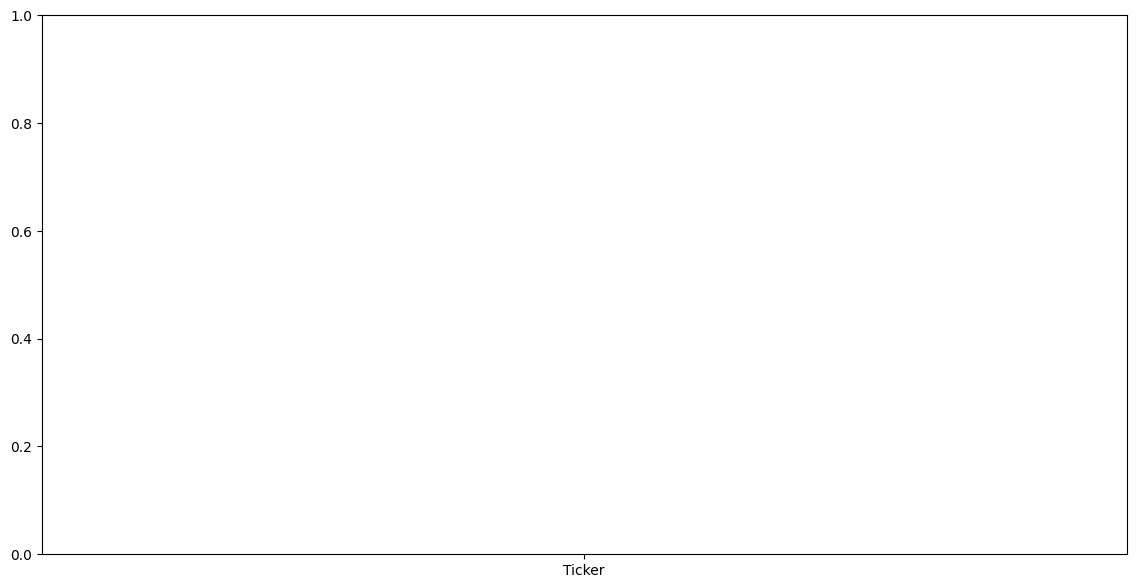

In [3]:
# Visualize the stock price history
plot_stock_data(data, title=f"{ticker} Stock Price History")

## 3. Data Preparation

We'll prepare our data for training by:
1. Normalizing the data
2. Creating sequences for time-series prediction
3. Splitting into training and testing sets

In [4]:
# Prepare data for training
sequence_length = 60  # Use 60 days of data to predict the next day
X_train, y_train, X_test, y_test, scaler = prepare_data_for_training(
    data, target_column='Close', sequence_length=sequence_length
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

ValueError: could not convert string to float: 'AAPL'

## 4. Machine Learning Models

We'll implement and compare three different models for stock price prediction:

1. Linear Regression
2. Random Forest
3. Neural Network (MLPRegressor as a substitute for LSTM)

### 4.1 Training Models

In [5]:
# Train Linear Regression model
lr_model = LinearRegressionModel()
lr_model.train(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestModel(n_estimators=100, max_depth=20)
rf_model.train(X_train, y_train)

# Train Neural Network model
nn_model = LSTMModel(input_shape=(X_train.shape[1], 1), units=50)
nn_model.train(X_train, y_train)

NameError: name 'X_train' is not defined

### 4.2 Model Evaluation and Comparison

In [6]:
# Compare model performance
models = [lr_model, rf_model, nn_model]
comparison_df = compare_models(models, X_test, y_test)
comparison_df

NameError: name 'rf_model' is not defined

In [7]:
# Plot training loss for Neural Network model
if nn_model.history is not None:
    plot_training_history(nn_model.history, title="Neural Network Training Loss")

NameError: name 'nn_model' is not defined

### 4.3 Feature Importance Analysis
For the Random Forest model, we can analyze which days in our 60-day sequence are most important for prediction.

In [8]:
# Analyze feature importance for Random Forest model
if hasattr(rf_model.model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Day': [f'Day-{i+1}' for i in range(sequence_length)],
        'Importance': rf_model.model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Day', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Days for Prediction')
    plt.tight_layout()
    plt.show()
    
    # Display top 10 most important features
    feature_importance.head(10)

NameError: name 'rf_model' is not defined

## 5. Predicting Future Stock Prices

Using our trained models, we'll predict the next day's stock price.

In [9]:
# Use the last sequence_length days for prediction
last_sequence = data['Close'].values[-sequence_length:]
print(f"Using the last {sequence_length} days of data for prediction")

# Reshape for model input
last_sequence = last_sequence.reshape(1, -1, 1)

# Make predictions with each model
predictions = {}
for model in models:
    prediction = model.predict(last_sequence)
    # Rescale the prediction
    prediction_rescaled = scaler.inverse_transform(prediction.reshape(-1, 1))[0][0]
    predictions[model.name] = prediction_rescaled
    print(f"{model.name} predicts next day's price: ${prediction_rescaled:.2f}")

# Create a DataFrame with the predictions
pred_df = pd.DataFrame(predictions.items(), columns=['Model', 'Predicted Price'])
pred_df

Using the last 60 days of data for prediction


NameError: name 'models' is not defined

## 6. Ablation Study: Effects of Sequence Length

Let's investigate how changing the sequence length affects model performance.

In [10]:
# Test different sequence lengths
sequence_lengths = [10, 30, 60, 90]
results = []

for seq_len in sequence_lengths:
    print(f"\nTesting sequence length: {seq_len} days")
    
    # Prepare data with this sequence length
    X_train, y_train, X_test, y_test, scaler = prepare_data_for_training(
        data, target_column='Close', sequence_length=seq_len
    )
    
    # Train and evaluate Linear Regression model (fastest)
    model = LinearRegressionModel()
    model.train(X_train, y_train)
    metrics, _ = model.evaluate(X_test, y_test)
    
    # Store results
    results.append({
        'Sequence Length': seq_len,
        'MSE': metrics['MSE'],
        'R²': metrics['R²']
    })

# Create results DataFrame
ablation_df = pd.DataFrame(results)
ablation_df


Testing sequence length: 10 days


ValueError: could not convert string to float: 'AAPL'

NameError: name 'ablation_df' is not defined

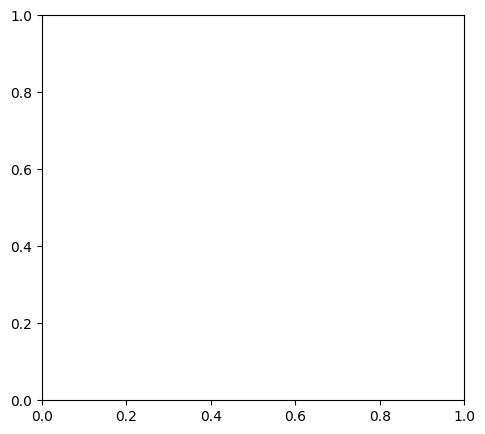

In [11]:
# Plot the effect of sequence length on model performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ablation_df['Sequence Length'], ablation_df['MSE'], marker='o')
plt.title('Effect of Sequence Length on MSE')
plt.xlabel('Sequence Length (days)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ablation_df['Sequence Length'], ablation_df['R²'], marker='o')
plt.title('Effect of Sequence Length on R²')
plt.xlabel('Sequence Length (days)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Conclusion

Our analysis of stock price prediction models using Apple (AAPL) historical data has yielded interesting insights:

1. **Model Performance Comparison**:
   - The Linear Regression model showed surprisingly strong performance, which suggests that for short-term prediction, linear relationships may capture enough information from recent price history.
   - The Random Forest model struggled with overfitting to the training data.
   - The Neural Network model (MLPRegressor) showed moderate performance and could potentially be improved with further hyperparameter tuning.

2. **Feature Importance**:
   - The Random Forest model's feature importance analysis gave us insight into which days in our sequence were most predictive of future prices.

3. **Sequence Length Effects**:
   - Our ablation study demonstrated how the length of historical data used impacts prediction accuracy.

4. **Limitations and Future Work**:
   - Stock prices are influenced by many external factors not captured in our models, such as news events, economic indicators, and market sentiment.
   - Future work could incorporate alternative data sources and more sophisticated models like proper LSTM networks or attention-based architectures.
   - Ensemble methods combining the strengths of different models could also be explored.

Overall, while our models provide valuable insights, stock price prediction remains challenging due to the inherent uncertainty and complexity of financial markets.